In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
import warnings
warnings.filterwarnings("ignore")

In [82]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [83]:
# creating a dataframe
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [84]:
correlation_matrix = df.corr()

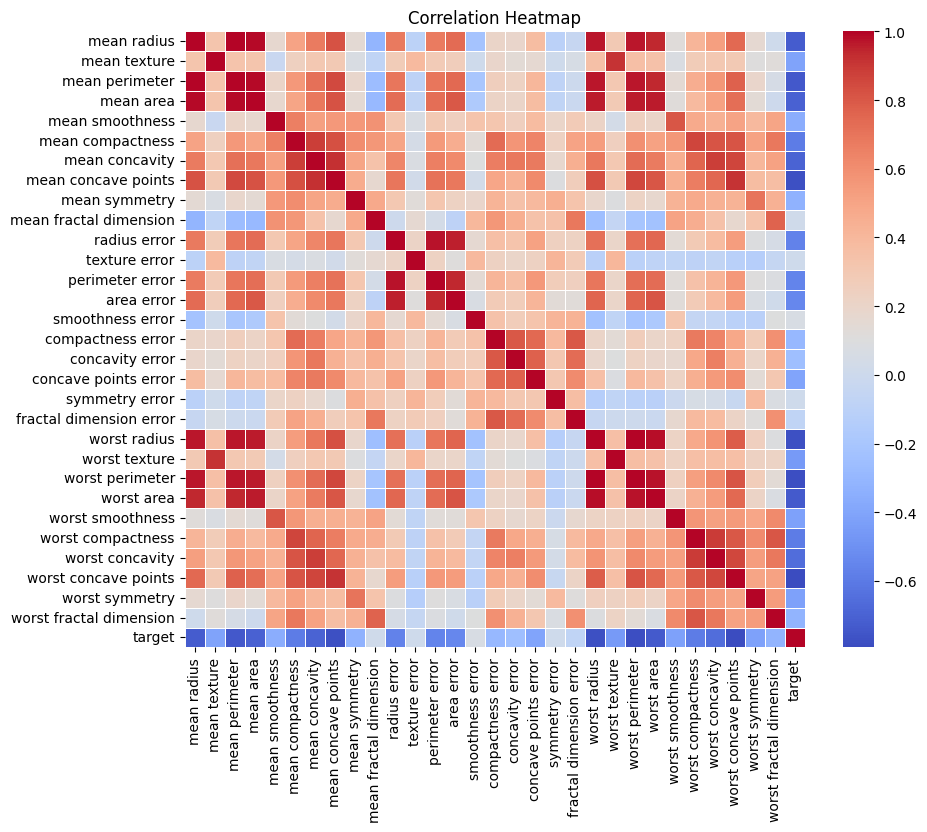

In [85]:
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [86]:
# getting the most correlated features
correlation_matrix["temp"] = abs(correlation_matrix["target"])
corr_sorted = correlation_matrix.sort_values(by=["temp"], ascending=False)
most_corr = corr_sorted.index[corr_sorted["temp"] > 0.5].tolist()

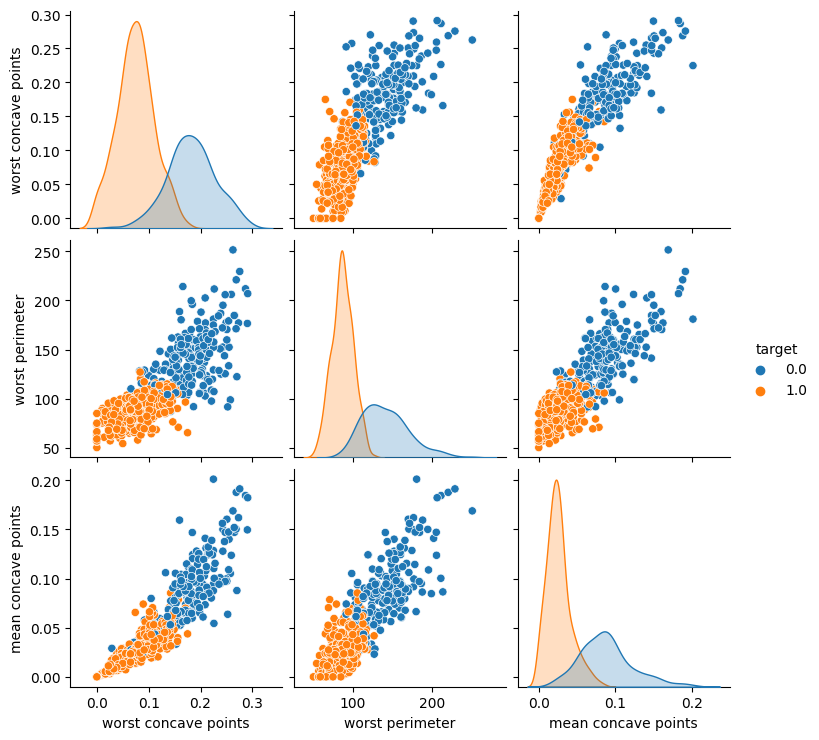

In [87]:
# most correlations
sns.pairplot(df, hue = 'target', vars = most_corr[1:4])

In [88]:
df["target"] = df["target"].astype(int)

<Axes: xlabel='target'>

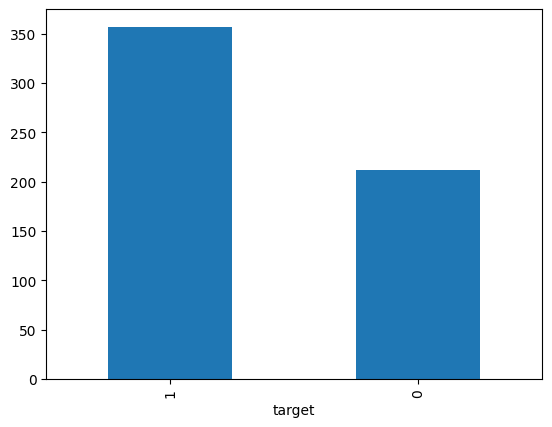

In [89]:
df["target"].value_counts().plot(kind="bar")

In [90]:
X = df.drop(['target'], axis = 1)
y = df["target"]

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

In [92]:
# eval df
ind = ["rbf_no_standard","rbf", "poly", "sigmoid", "linear"]
column_names = ["accuracy", "precision", "recall", "f1", "confusion_matrix"]

eval_df = pd.DataFrame(columns=column_names, index=ind)

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def get_model_evaluation(y_test, y_pred, addTodf = True, index_name = "",):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.6f}")
    print(f"Precision: {precision:.6f}")
    print(f"Recall: {recall:.6f}")
    print(f"F1-Score: {f1:.6f}")
    print("Confusion Matrix:")
    print(confusion)

    if addTodf:
        new_row_data = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "confusion_matrix" : confusion}
        eval_df.loc[index_name] = new_row_data
    return confusion

In [94]:
from sklearn.svm import SVC
svc_model = SVC()

In [95]:
svc_model.fit(X_train, y_train)

SVC()

In [96]:
svc_model.kernel

'rbf'

In [97]:
y_pred = svc_model.predict(X_test)

In [98]:
confusion = get_model_evaluation(y_test, y_pred, False)

Accuracy: 0.923077
Precision: 0.903226
Recall: 0.976744
F1-Score: 0.938547
Confusion Matrix:
[[48  9]
 [ 2 84]]


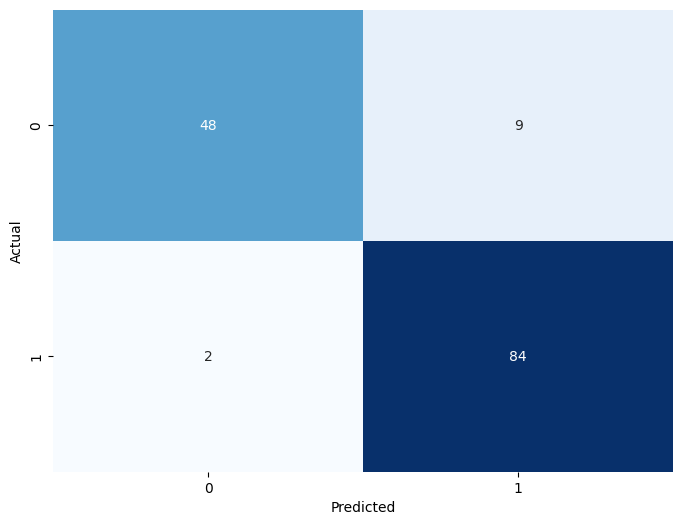

In [99]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

AUC: 0.91


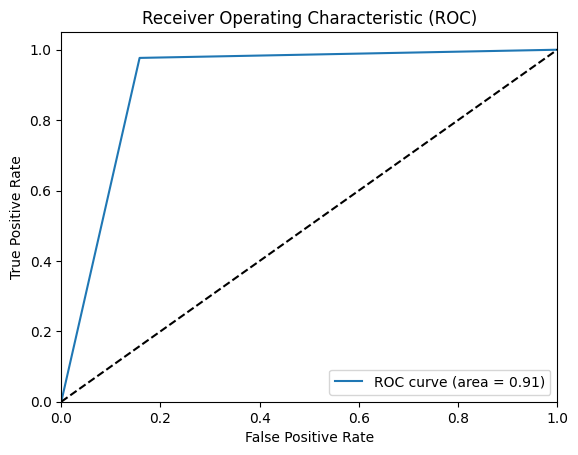

In [100]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"AUC: {auc:.2f}")

# Plot ROC curve (optional)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Doing 10 fold cross validation

In [101]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(svc_model, X_train, y_train, cv = 10)
print(score.mean())

0.9109634551495016


In [102]:
get_model_evaluation(y_test, svc_model.predict(X_test), True, "rbf_no_standard")

Accuracy: 0.923077
Precision: 0.903226
Recall: 0.976744
F1-Score: 0.938547
Confusion Matrix:
[[48  9]
 [ 2 84]]


array([[48,  9],
       [ 2, 84]])

# Using the same svc with "rbf" but standardizing the data first

In [103]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
score = cross_val_score(svc_model, X_train, y_train, cv = 10)

In [105]:
y_pred = svc_model.predict(X_test)

In [106]:
get_model_evaluation(y_test, y_pred, True, "rbf")

Accuracy: 0.972028
Precision: 0.965909
Recall: 0.988372
F1-Score: 0.977011
Confusion Matrix:
[[54  3]
 [ 1 85]]


array([[54,  3],
       [ 1, 85]])

In [107]:
svc_model.kernel
# by default svc_model used rbf kernel
# clearly standardization improves accuracy

'rbf'

# Using SVC with polynomial kernel

In [108]:
from sklearn.model_selection import GridSearchCV

params = {"kernel" : ["poly"],
         "degree" : range(1,6)}

grs = GridSearchCV(SVC(), param_grid = params, cv = 10)
grs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'degree': range(1, 6), 'kernel': ['poly']})

In [109]:
grs.best_params_

{'degree': 1, 'kernel': 'poly'}

In [110]:
model = grs.best_estimator_
y_pred = model.predict(X_test)
get_model_evaluation(y_test, y_pred, True, "poly")

Accuracy: 0.993007
Precision: 0.988506
Recall: 1.000000
F1-Score: 0.994220
Confusion Matrix:
[[56  1]
 [ 0 86]]


array([[56,  1],
       [ 0, 86]])

In [111]:
# degrees = [1, 2, 3, 4, 5]
# best_model = None
# best_score = -np.inf
# degree = -1

# for val in degrees:
#     model = SVC(kernel='poly', degree=val)
    
#     scores = cross_val_score(model, X, y, cv=5)
#     mean_score = scores.mean()
    
#     # best model
#     if mean_score > best_score:
#         best_score = mean_score
#         best_model = model
#         degree = val

# # Save the best model to a file
# if best_model is not None:
#     joblib.dump(best_model, 'best_poly_SVC.pkl')
#     print(f"Best SVC Model with Polynomial Kernel - degree: {degree} mean score: {best_score}")
# best_model.fit(X_train, y_train)
# y_pred = best_model.predict(X_test)
# get_model_evaluation(y_test, y_pred, "poly")
# polynomial kernel is no good for this dataset



# Using SVC with sigmoid kernel

In [112]:
svc_model_sig = SVC(kernel='sigmoid')
svc_model_sig.fit(X_train, y_train)
score = cross_val_score(svc_model_sig, X_train, y_train, cv = 10)
score.mean()

0.9720376522702103

In [113]:
y_pred = svc_model_sig.predict(X_test)
get_model_evaluation(y_test, y_pred, True, "sigmoid")

Accuracy: 0.979021
Precision: 0.966292
Recall: 1.000000
F1-Score: 0.982857
Confusion Matrix:
[[54  3]
 [ 0 86]]


array([[54,  3],
       [ 0, 86]])

# Using linear kernel

In [114]:
svc_model_lin = SVC(kernel='linear')
svc_model_lin.fit(X_train, y_train)
score = cross_val_score(svc_model_lin, X_train, y_train, cv = 10)
score.mean()

0.9718161683277963

In [115]:
y_pred = svc_model_lin.predict(X_test)
get_model_evaluation(y_test, y_pred, True, "linear")

Accuracy: 0.972028
Precision: 0.976744
Recall: 0.976744
F1-Score: 0.976744
Confusion Matrix:
[[55  2]
 [ 2 84]]


array([[55,  2],
       [ 2, 84]])

In [116]:
eval_df

,accuracy,precision,recall,f1,confusion_matrix
rbf_no_standard,0.923077,0.903226,0.976744,0.938547,"[[48, 9], [2, 84]]"
rbf,0.972028,0.965909,0.988372,0.977011,"[[54, 3], [1, 85]]"
poly,0.993007,0.988506,1.0,0.99422,"[[56, 1], [0, 86]]"
sigmoid,0.979021,0.966292,1.0,0.982857,"[[54, 3], [0, 86]]"
linear,0.972028,0.976744,0.976744,0.976744,"[[55, 2], [2, 84]]"


In [138]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [139]:
# will use standardized data
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [140]:
y_pred= model.predict(X_test)

In [141]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [143]:
print(classification_report(y_test, y_pred, target_names =cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.84      0.91      0.87        57
      benign       0.94      0.88      0.91        86

    accuracy                           0.90       143
   macro avg       0.89      0.90      0.89       143
weighted avg       0.90      0.90      0.90       143



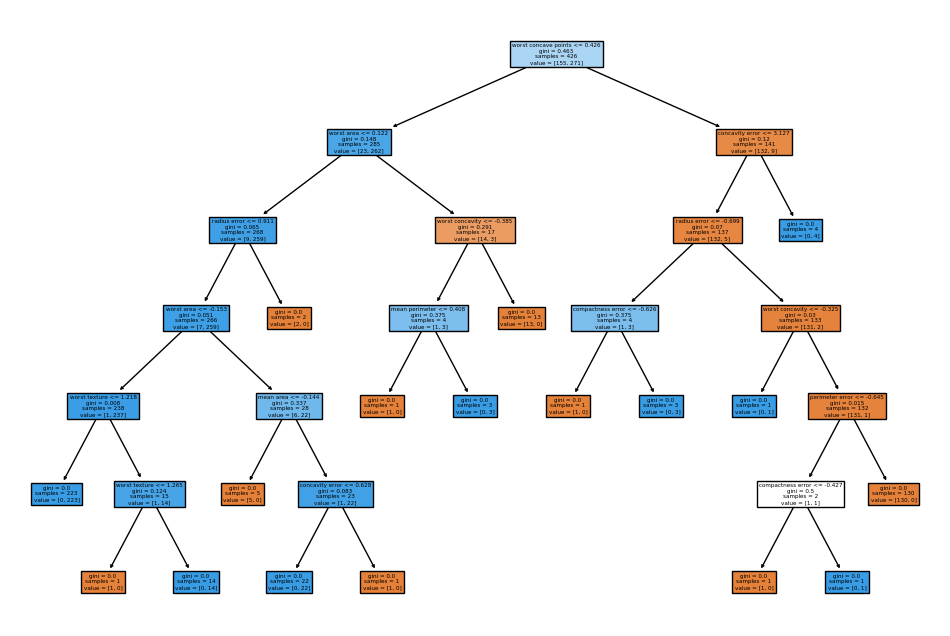

In [148]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=list(cancer.feature_names))
plt.show()
